# Visualization of Cell Type Distribution in Each Fold (Q1-Q4)

In [3]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

In [4]:
# Define the images_4fold directory path
base_dir = "images/images_4fold"

# Check if the directory exists
if not os.path.exists(base_dir):
    print(f"Error: {base_dir} directory does not exist")
else:
    print(f"Found directory: {base_dir}")

Found directory: images/images_4fold


In [5]:
cell_group_map = {
    # Immune
    "CD4+_T_Cells": "Immune",
    "CD8+_T_Cells": "Immune",
    "B_Cells": "Immune",
    "IRF7+_DCs": "Immune",
    "LAMP3+_DCs": "Immune",
    "Macrophages_1": "Immune",
    "Macrophages_2": "Immune",
    "Mast_Cells": "Immune",

    #hybrids
    "Stromal_and_T_Cell_Hybrid": "Hybrid",
    "T_Cell_and_Tumor_Hybrid": "Hybrid",

    # Tumor
    "Prolif_Invasive_Tumor": "Tumor",
    "Invasive_Tumor": "Tumor",

    #early stage cancer
    "DCIS_1": "Early stage cancer",
    "DCIS_2": "Early stage cancer",

    # Connective tissue
    "Stromal": "Connective tissue",
    "Perivascular-Like": "Connective tissue",
    "Myoepi_ACTA2+": "Connective tissue",
    "Myoepi_KRT15+": "Connective tissue",

    #endothelial
    "Endothelial": "Endothelial",

    # Unlabeled
    "Unlabeled": "Unlabeled"
}

In [6]:
# Traverse the directory and count different cell types in each fold
fold_cell_counts = {}

# Assume directory structure as images_4fold/[fold]/[cell_type]/[images]
for fold in os.listdir(base_dir):
    fold_path = os.path.join(base_dir, fold)
    
    if os.path.isdir(fold_path):
        cell_counts = {}
        
        for cell_type in os.listdir(fold_path):
            cell_type_path = os.path.join(fold_path, cell_type)
            
            if os.path.isdir(cell_type_path):
                # Calculate the number of images of this cell type
                image_count = len([f for f in os.listdir(cell_type_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
                cell_counts[cell_type] = image_count
        
        fold_cell_counts[fold] = cell_counts


In [7]:
# Convert the data to DataFrame format for easier visualization
data_rows = []
for fold, cell_types in fold_cell_counts.items():
    for cell_type, count in cell_types.items():
        data_rows.append({'Fold': fold, 'Cell Type': cell_type, 'Count': count})

df = pd.DataFrame(data_rows)

In [8]:
# Add the cell group to the DataFrame based on cell_group_map
df['Cell Group'] = df['Cell Type'].map(cell_group_map)

# Check if there are any NaN values in 'Cell Group' (indicating missing mappings)
if df['Cell Group'].isnull().any():
    missing_types = df[df['Cell Group'].isnull()]['Cell Type'].unique()
    print("Warning: The following cell types do not have a group mapping:")
    print(missing_types)

# Aggregate counts by fold and cell group
group_counts = df.groupby(['Fold', 'Cell Group'])['Count'].sum().reset_index()


## Cell Group Distribution For Each Quadrant

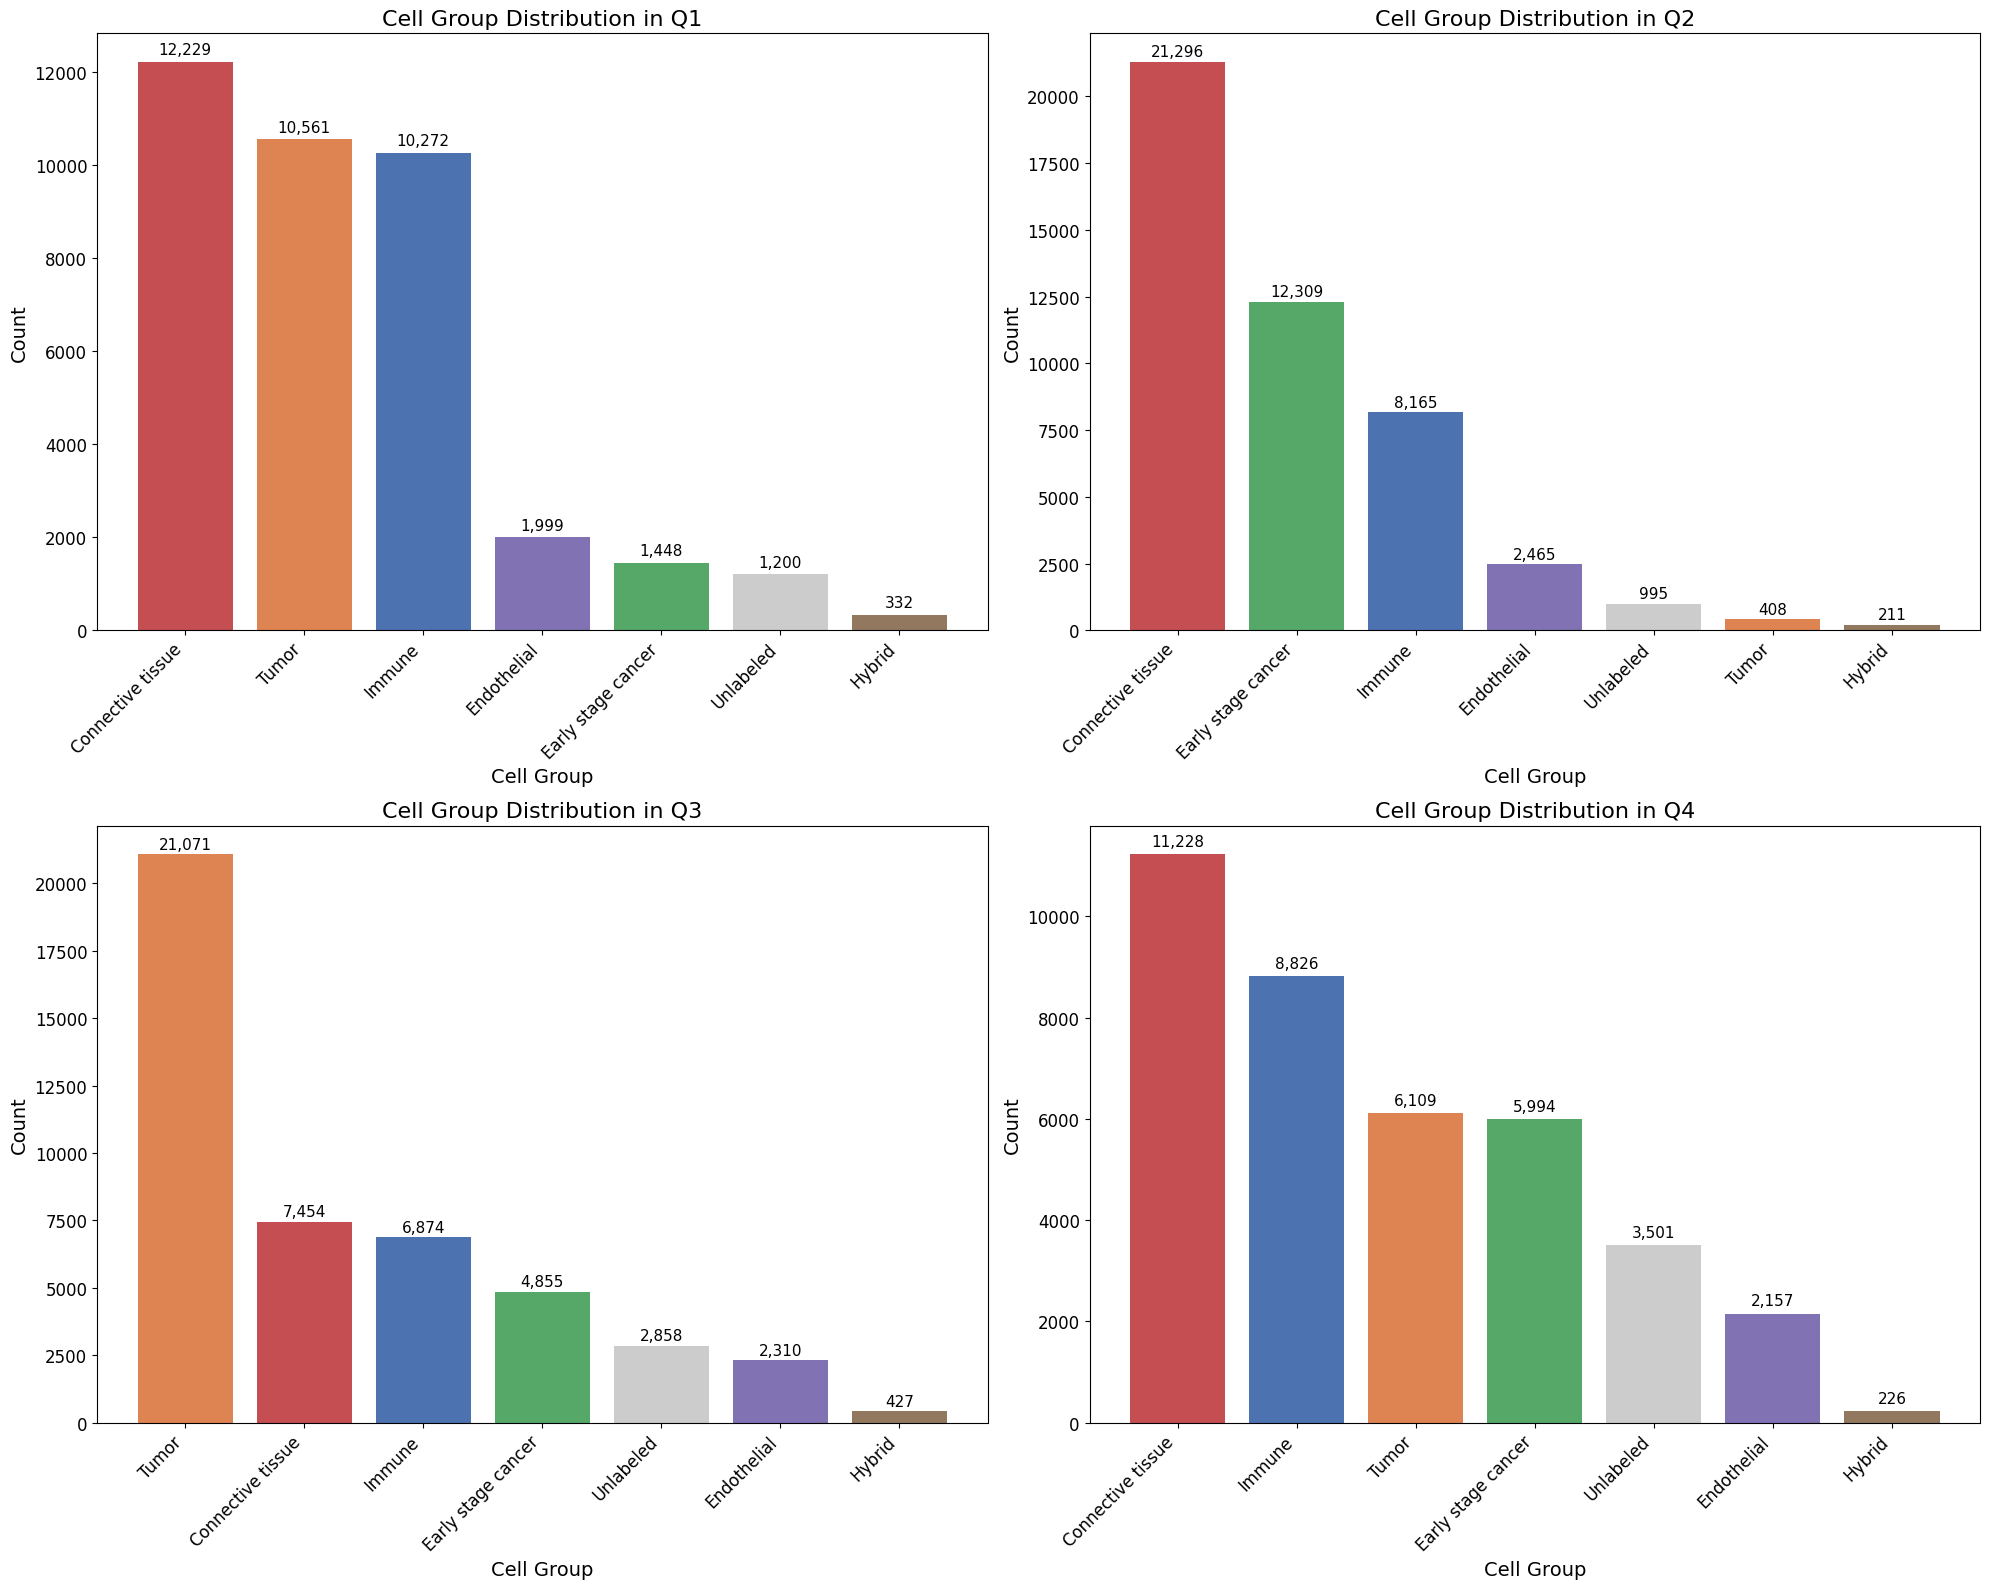

In [9]:
# Create separate plots for each fold (Q1-Q4) showing cell groups
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

folds = ['Q1', 'Q2', 'Q3', 'Q4']
colors = {
    'Immune': '#4C72B0',
    'Tumor': '#DD8452',
    'Early stage cancer': '#55A868',
    'Connective tissue': '#C44E52',
    'Endothelial': '#8172B3',
    'Hybrid': '#937860',
    'Unlabeled': '#CCCCCC'
}

for i, fold in enumerate(folds):
    # Filter data for the current fold
    fold_data = group_counts[group_counts['Fold'] == fold]
    
    # Sort by count for better visualization
    fold_data = fold_data.sort_values('Count', ascending=False)
    
    # Create the bar plot with custom colors
    bars = axes[i].bar(fold_data['Cell Group'], fold_data['Count'], color=[colors.get(group, '#CCCCCC') for group in fold_data['Cell Group']])
    
    # Set title and labels
    axes[i].set_title(f'Cell Group Distribution in {fold}', fontsize=16)
    axes[i].set_xlabel('Cell Group', fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    
    # Add count values on top of each bar
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 100,
                 f'{int(height):,}', ha='center', va='bottom', fontsize=11)
    
    # Set tick parameters
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

## Comparing Cell Distribution Across Folds

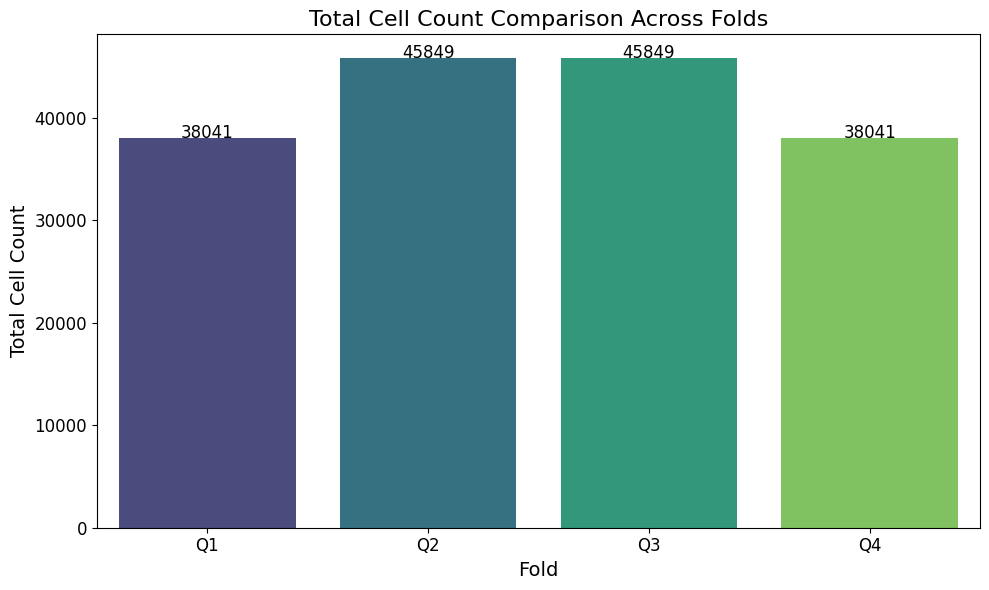

In [10]:
# Calculate the total number of cells in each fold
fold_totals = df.groupby('Fold')['Count'].sum().reset_index()

# Create a bar chart to compare the total number of cells in each fold
plt.figure(figsize=(10, 6))
sns.barplot(x='Fold', y='Count', hue='Fold', data=fold_totals, palette='viridis', legend=False)
plt.title('Total Cell Count Comparison Across Folds', fontsize=16)
plt.xlabel('Fold', fontsize=14)
plt.ylabel('Total Cell Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add numerical labels above each bar
for i, v in enumerate(fold_totals['Count']):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()